In [1]:
#import libraries
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
from matplotlib import gridspec 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Solution Parameters 
xmax=10000.0
nx=10000
dx=xmax/(nx-1)
x=np.linspace(0,xmax,nx)
f0=25.0
t0=4/f0
nt=1000
dt=0.001
t=np.linspace(0,(nt+1)*dt,nt+1)
sloc=int(xmax/(2.0*dx))

In [3]:
#Source Term Definition
s=np.zeros(nt+1)
s=-2*(t-t0)*(f0**2)*np.exp(-(f0**2)*(t-t0)**2)

<IPython.core.display.Javascript object>


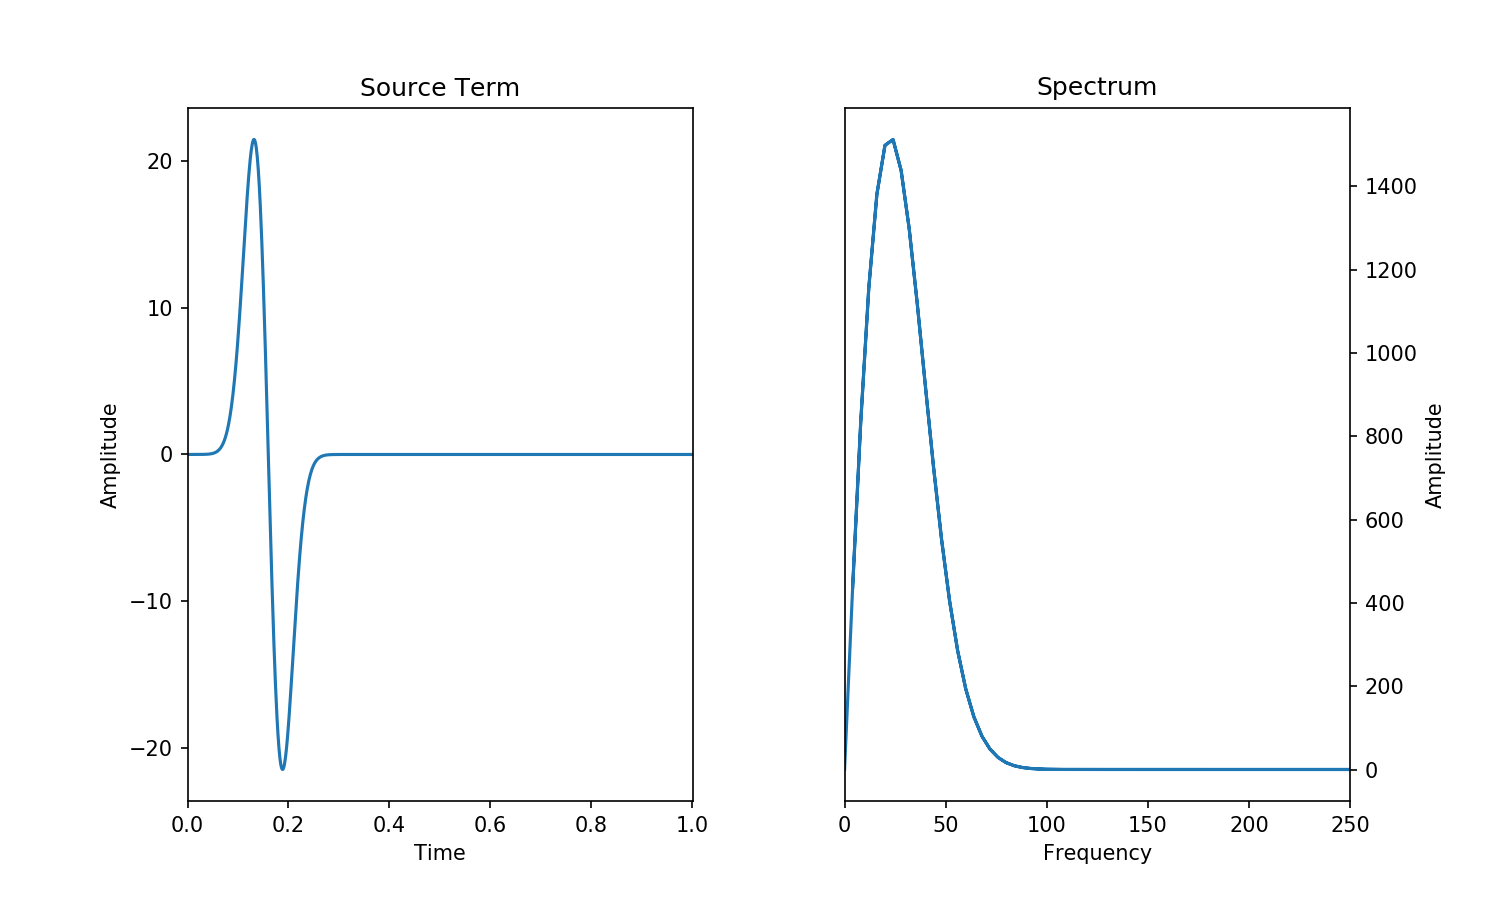

In [5]:
#Plotting Source Term
plt.ion()
fig1 = plt.figure(figsize=(10,6))
grid = gridspec.GridSpec(1, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)
#grid = fig1.add_gridspec(1, 2, width_ratios=[1,1], wspace=0.3, hspace=0.3)
ax1 = plt.subplot(grid[0,0])
ax1.plot(t,s)
ax1.set_xlim(t[0],t[-1])
ax1.set_title('Source Term')
ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude')
ax2 = plt.subplot(grid[0,1])
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Amplitude')
spec = np.fft.fft(s)
freq = np.fft.fftfreq(spec.size,d=dt/4) # time domain to frequency domain
ax2.plot(abs(freq),abs(spec))
ax2.set_title('Spectrum')
ax2.set_xlim(0,250)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.show()

<IPython.core.display.Javascript object>


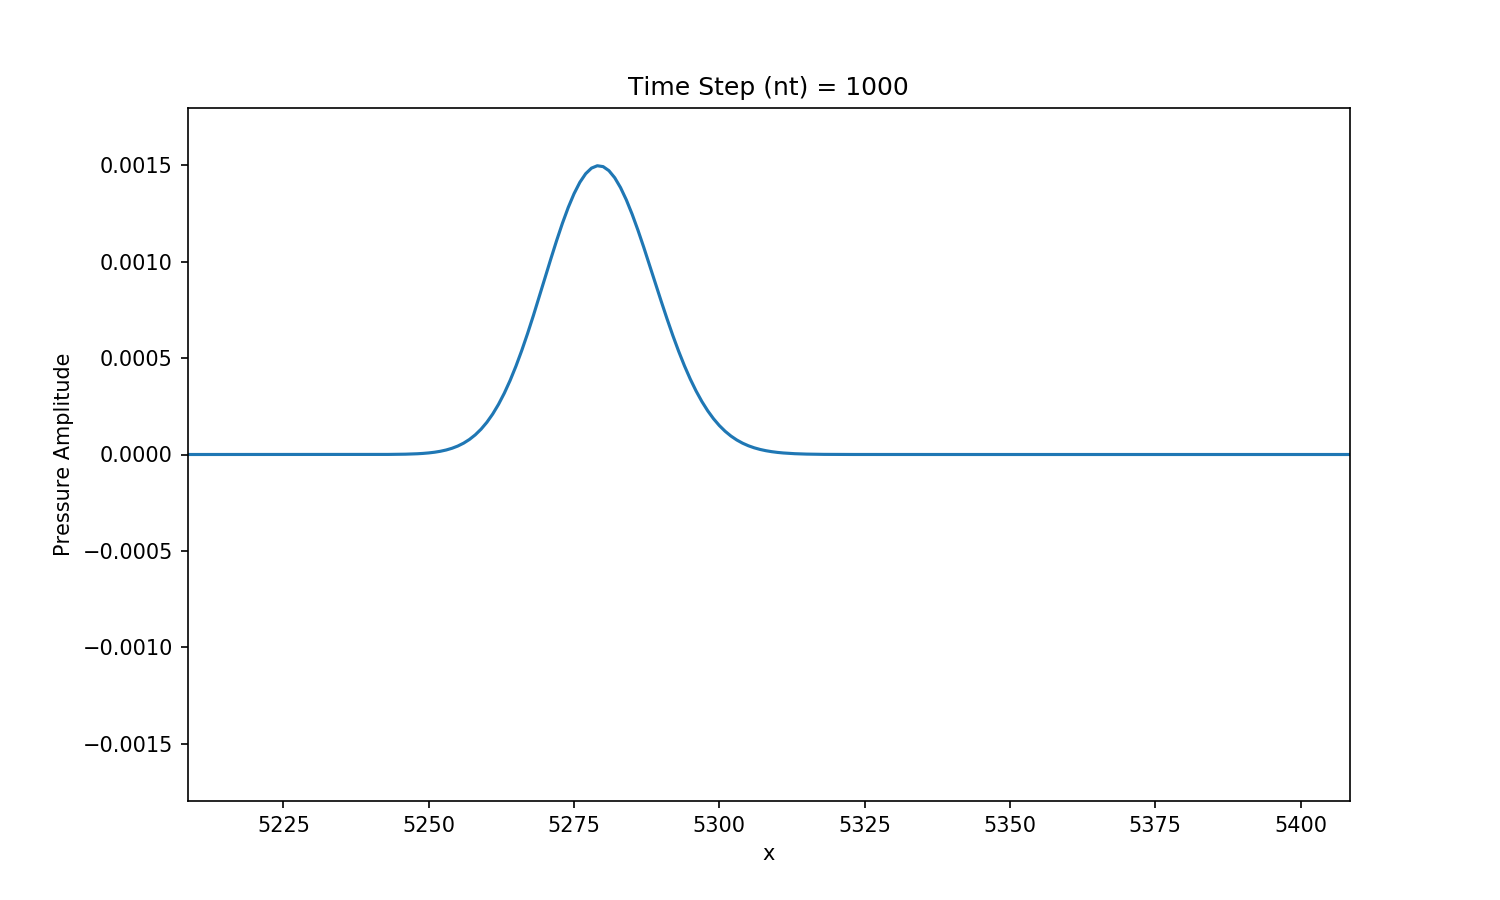

In [36]:

#Pressure and velocity initialization
isrc=sloc
pnew=np.zeros(nx)
pold=np.zeros(nx)
p=np.zeros(nx)
c0=334
c=np.zeros(nx)
c=c+c0

#figure plotting
plt.ion()
fig2=plt.figure(figsize=(10,6))
grid2=gridspec.GridSpec(1,1,width_ratios=[1])
ax3=plt.subplot(grid2[0])
pl1,=ax3.plot(sloc,0,'r*',markersize=11)
up31,=ax3.plot(p)
ax3.set_xlim(0, xmax)
ax3.set_ylim(-np.max(p),np.max(p))
ax3.set_title('Time Step = 0')
ax3.set_xlabel('x')
ax3.set_ylabel('Pressure Amplitude')
#plt.show()

plt.show()


In [37]:
idisp = 5
print('%d' %(sloc))
d2px = np.zeros(nx)
for it in range(1,nt+1):
    for j in range(1,nx-1):
        #d2px[j] = (c**2 * dt**2 / dx**2) * (p[j-1] - 2*p[j] + p[j+1])
        d2px[j] = (p[j-1] - 2*p[j] + p[j+1]) / dx**2
    pnew = 2*p - pold + c**2 * dt**2 * d2px
    pnew[sloc] = pnew[sloc] + s[it] * dt**2/dx
    #print('%f' %(pnew[sloc]))
    if (it % idisp) == 0:
        
        
        window=100
        xshift=25
        ax3.set_title('Time Step (nt) = %d' % it)
        up31.set_ydata(p)
        ax3.set_ylim(-1.2*np.max(abs(p)),1.2*np.max(abs(p)))
        ax3.set_xlim(sloc*dx+c0*dt*it-window*dx-xshift,sloc*dx+c0*dt*it+window*dx-xshift)
        #ax3.set_xlim(0,10000)
        plt.gcf().canvas.draw()
        
    pold = p
    p = pnew


4999


"    \n# 1D Wave Propagation (Finite Difference Solution) \n# ------------------------------------------------\nidisp=5\nisrc=sloc\n# Loop over time\nfor it in range(nt):\n\n    # 2nd derivative in space\n    for i in range(1, nx - 1):\n        d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1]) / dx ** 2\n\n\n    # Time Extrapolation\n    # ------------------\n    pnew = 2 * p - pold + c ** 2 * dt ** 2 * d2px\n\n    # Add Source Term at isrc\n    # -----------------------\n    # Absolute pressure w.r.t analytical solution\n    pnew[isrc] = pnew[isrc] + s[it] / (dx) * dt ** 2\n    \n            \n    # Remap Time Levels\n    # -----------------\n    pold, p = p, pnew\n    \n    # Plot pressure field\n    # -------------------------------------\n    if (it % idisp) == 0:\n        ax3.set_title('Time Step (nt) = %d' % it)\n        ax3.set_ylim(-1.1*np.max(abs(p)), 1.1*np.max(abs(p)))\n        # plot around propagating wave\n        window=100;xshift=25\n        ax3.set_xlim(isrc*dx+c0*it*dt-windo